In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
# calculating mode value of publisher
mode_pub = dfn['Publisher'].mode()

# Replace NaN value with mode value of publisher
dfn['Publisher'].fillna(mode_pub[0], inplace=True)



# Calculate the median of the 'Year' column
median_year = df['Year'].median()

# Replace NaN values in the 'Year' column with the median
df['Year'].fillna(median_year, inplace=True)

NameError: name 'dfn' is not defined

In [5]:
df = pd.read_csv('ps4salesfixed.csv')  # Read from CSV
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,2016.0,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,2016.0,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,2016.0,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [11]:
data = {'Game': ['GTA', 'Uncharted', 'GOW'], 'Year': [2015, 2013, 2016], 'Genre': ['Action', 'Shooter', 'Sports'], 'Publisher': ['Rockstar','Activision','Namco'], 'North America': [6.09, 5.36, 0.15], 'Europe': [6.06, 8.65, 1.27], 'Japan': [2.45, 6.21, 8.43], 'Rest Of The World': [3.02, 2.44, 1.73], 'Global': [11.80, 0.15, 2.31]}
dum = pd.DataFrame(data)
print(dum)
# Output:
#       Name  Age
# 0    Alice   25
# 1      Bob   30
# 2  Charlie   35

        Game  Year    Genre   Publisher  North America  Europe  Japan  \
0        GTA  2015   Action    Rockstar           6.09    6.06   2.45   
1  Uncharted  2013  Shooter  Activision           5.36    8.65   6.21   
2        GOW  2016   Sports       Namco           0.15    1.27   8.43   

   Rest Of The World  Global  
0               3.02   11.80  
1               2.44    0.15  
2               1.73    2.31  


In [13]:
# 1.Identify the top 5 best-selling games globally:
top_5_games = df.nlargest(5, 'Global')
print(top_5_games[['Game', 'Global']])


                        Game  Global
0         Grand Theft Auto V   19.39
1  Call of Duty: Black Ops 3   15.09
2      Red Dead Redemption 2   13.94
3         Call of Duty: WWII   13.40
4                    FIFA 18   11.80


In [15]:
# 2.Compare regional sales for each genre to understand market preferences:
regional_sales = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
print(regional_sales)

                  North America  Europe  Japan  Rest of World
Genre                                                        
Action                    48.15   57.53  10.27          20.76
Action-Adventure          22.30   27.79   1.96           9.83
Adventure                  5.27    6.08   1.64           2.23
Fighting                   8.58    6.19   1.67           2.98
MMO                        1.32    1.45   0.20           0.55
Misc                       3.64    6.03   0.96           1.85
Music                      2.40    1.62   0.17           0.84
Party                      0.09    0.47   0.00           0.10
Platform                   5.48    8.92   0.67           2.77
Puzzle                     0.28    0.16   0.00           0.10
Racing                     5.86   14.77   0.76           3.81
Role-Playing              22.15   22.40   9.42           8.91
Shooter                   50.50   58.64   4.42          21.48
Simulation                 1.47    2.07   0.28           0.71
Sports  

In [17]:
# 3. Find the publisher with the highest total global sales:
top_publisher = df.groupby('Publisher')['Global'].sum().idxmax()
x= df.groupby('Publisher')['Global'].sum()
print(x)
print("Top Publisher:", top_publisher)

Publisher
2K Games                                   8.03
2K Sports                                 17.36
3D Realms                                  0.00
505 Games                                  4.19
5pb                                        0.12
                                          ...  
Warner Bros. Interactive Entertainment    27.83
Wired Productions                          0.08
Xseed Games                                0.08
Yacht Club Games                           0.14
Yeti                                       0.03
Name: Global, Length: 152, dtype: float64
Top Publisher: Activision


In [21]:
# 4.Analyze the year with the highest number of game releases:
most_releases_year = df['Year'].value_counts().idxmax()
x= df['Year'].value_counts()
print(x)
print("Year with most releases:", most_releases_year)


Year
2016.0    431
2017.0    254
2015.0    172
2014.0     98
2018.0     39
2013.0     20
2019.0     12
2020.0      8
Name: count, dtype: int64
Year with most releases: 2016.0


In [23]:
# 5. Determine the most popular genre globally based on total sales:
popular_genre = df.groupby('Genre')['Global'].sum().idxmax()
print("Most Popular Genre:", popular_genre)


Most Popular Genre: Action


In [25]:
# 6.Identify the game with the highest sales in Japan compared to other regions:
df['Japan_vs_Others'] = df['Japan'] - (df['North America'] + df['Europe'] + df['Rest of World'])
highest_japan_sales_game = df.loc[df['Japan_vs_Others'].idxmax(), 'Game']
print("Game with highest Japan sales relative to others:", highest_japan_sales_game)


Game with highest Japan sales relative to others: Dragon Quest XI


In [29]:
# 7. Examine if there is a correlation between sales in North America and Europe:
correlation = df['North America'].corr(df['Europe'])
print("Correlation between North America and Europe sales:", correlation)


Correlation between North America and Europe sales: 0.8159968279353843


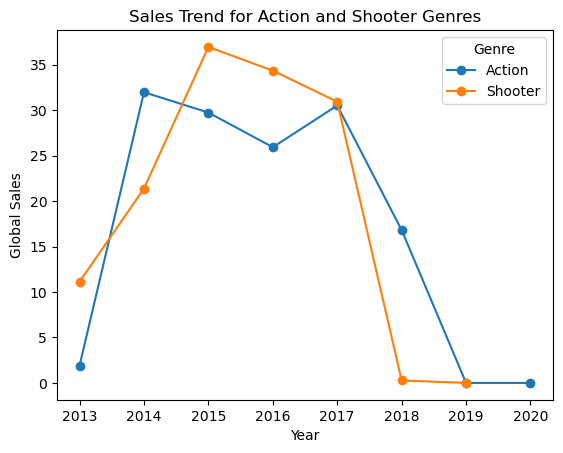

In [39]:
# 8. Compare the sales growth trend for "Action" and "Shooter" genres over the years:
trend_data = df[df['Genre'].isin(['Action', 'Shooter'])].groupby(['Year', 'Genre'])['Global'].sum().unstack()
trend_data.plot(kind='line', marker='o')
plt.title('Sales Trend for Action and Shooter Genres')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title='Genre')
plt.show()

In [31]:
# 9. Identify the top publisher in terms of sales for each region:
regions = ['North America', 'Europe', 'Japan', 'Rest of World']
top_publishers_by_region = {region: df.groupby('Publisher')[region].sum().idxmax() for region in regions}
print(top_publishers_by_region)


{'North America': 'Activision', 'Europe': 'Activision', 'Japan': 'Square Enix', 'Rest of World': 'Activision'}


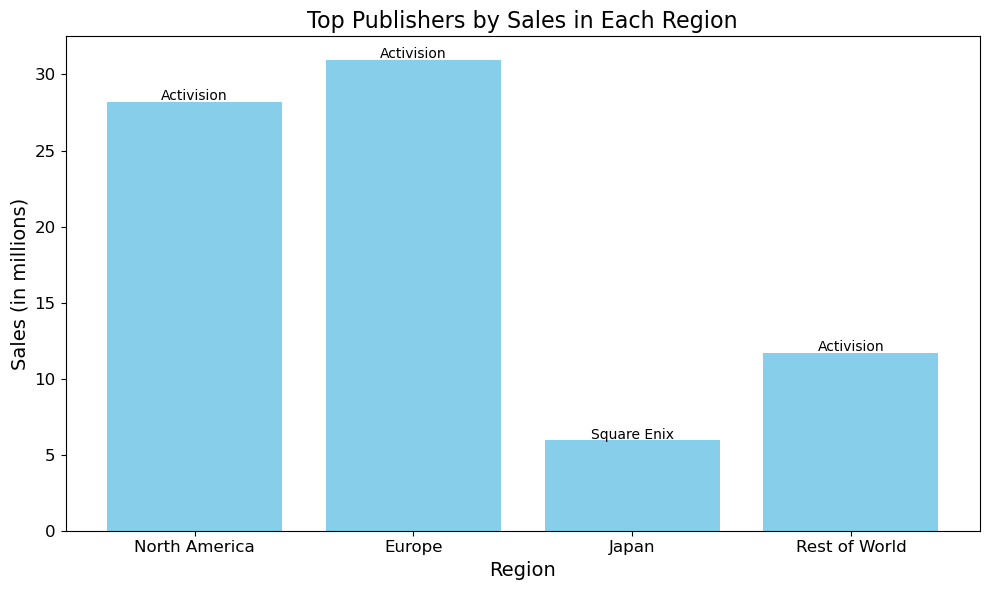

In [65]:
# 9. Identify the top publisher in terms of sales for each region:

regions = ['North America', 'Europe', 'Japan', 'Rest of World']

# Compute the total sales for each publisher in each region
region_sales = {region: df.groupby('Publisher')[region].sum() for region in regions}

# Identify the top publisher for each region and their sales
top_publishers = {region: region_sales[region].idxmax() for region in regions}
top_sales = {region: region_sales[region].max() for region in regions}

# Create a DataFrame for visualization
top_publishers_df = pd.DataFrame({
    'Region': regions,
    'Top Publisher': top_publishers.values(),
    'Sales': top_sales.values()
})

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_publishers_df['Region'], top_publishers_df['Sales'], color='skyblue')
plt.title('Top Publishers by Sales in Each Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with the publisher names
for index, row in top_publishers_df.iterrows():
    plt.text(index, row['Sales'] + 0.1, row['Top Publisher'], ha='center', fontsize=10)

plt.tight_layout()
plt.show()

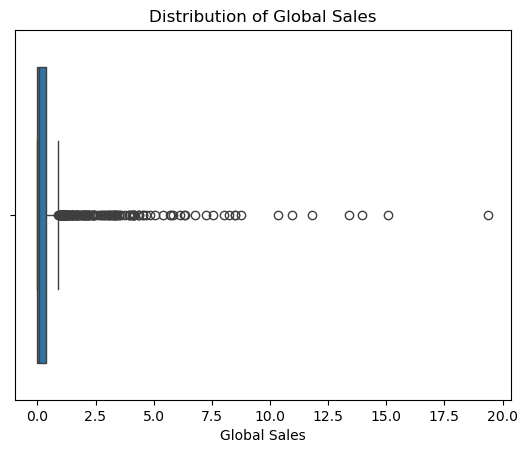

In [33]:
# 10. Visualize the distribution of global sales to identify patterns and outliers:
sns.boxplot(data=df['Global'], orient='h')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.show()

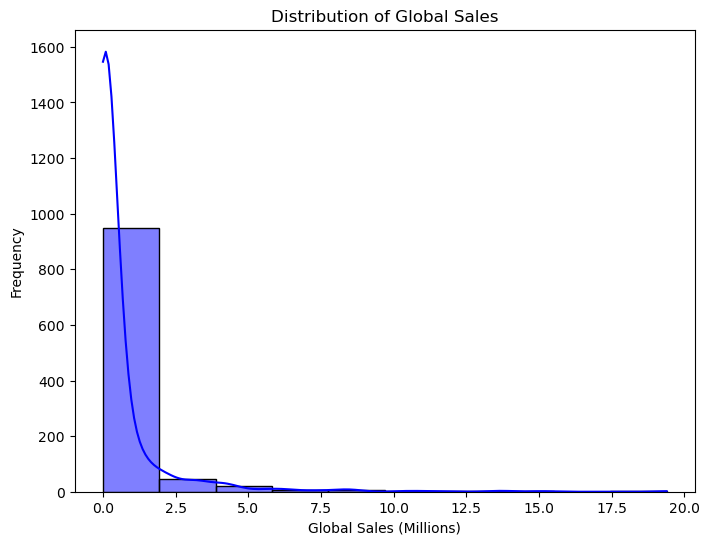

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Global', kde=True, bins=10, color='blue')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.show()


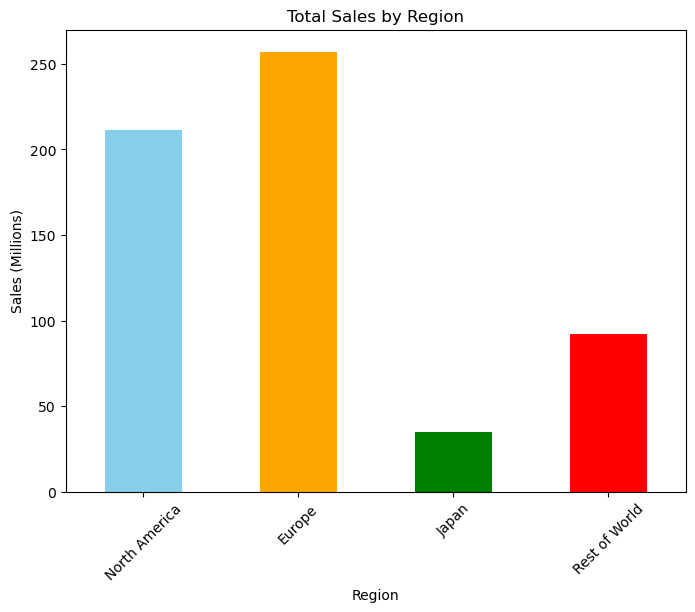

In [39]:
regional_totals = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
plt.figure(figsize=(8, 6))
regional_totals.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.show()


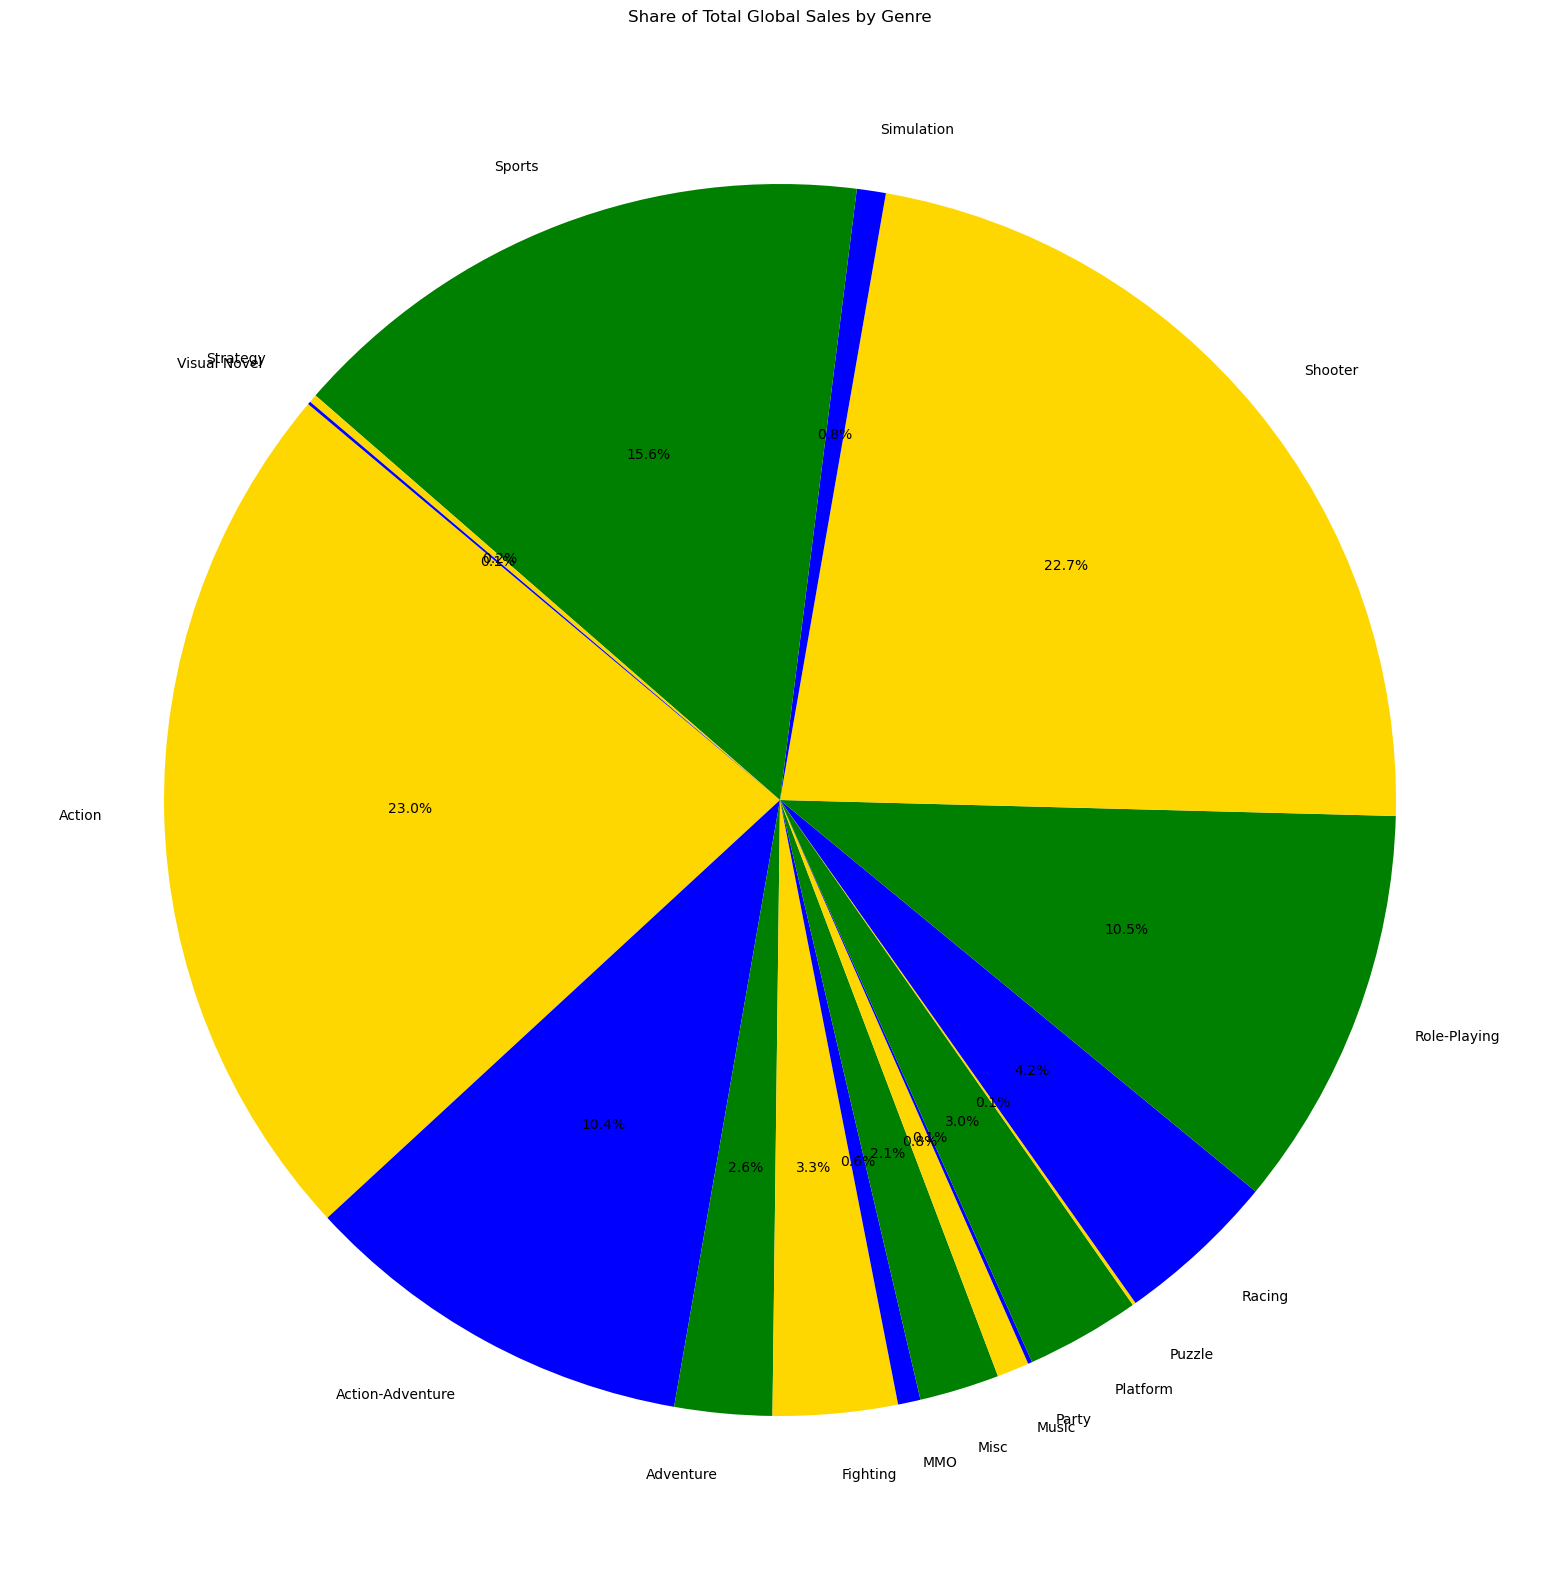

In [9]:
genre_sales = df.groupby('Genre')['Global'].sum()
plt.figure(figsize=(20, 20))
genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'blue', 'green'])
plt.title('Share of Total Global Sales by Genre')
plt.ylabel('')  # Remove y-axis label for better visuals
plt.show()


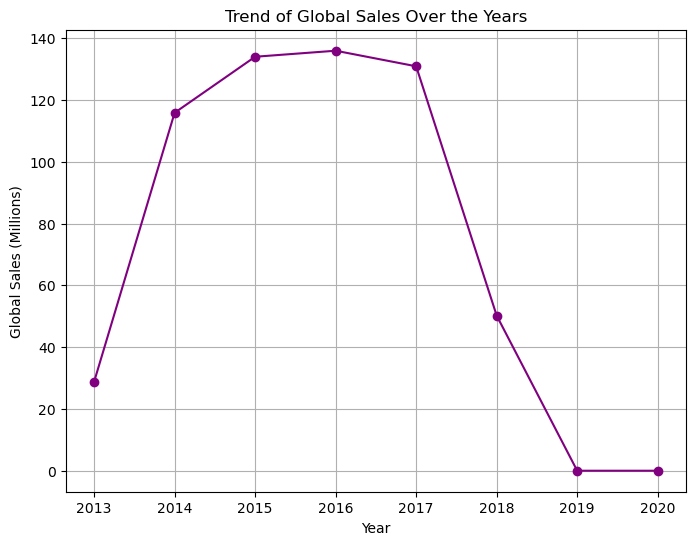

In [51]:
yearly_sales = df.groupby('Year')['Global'].sum()
plt.figure(figsize=(8, 6))
yearly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Trend of Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.grid()
plt.show()


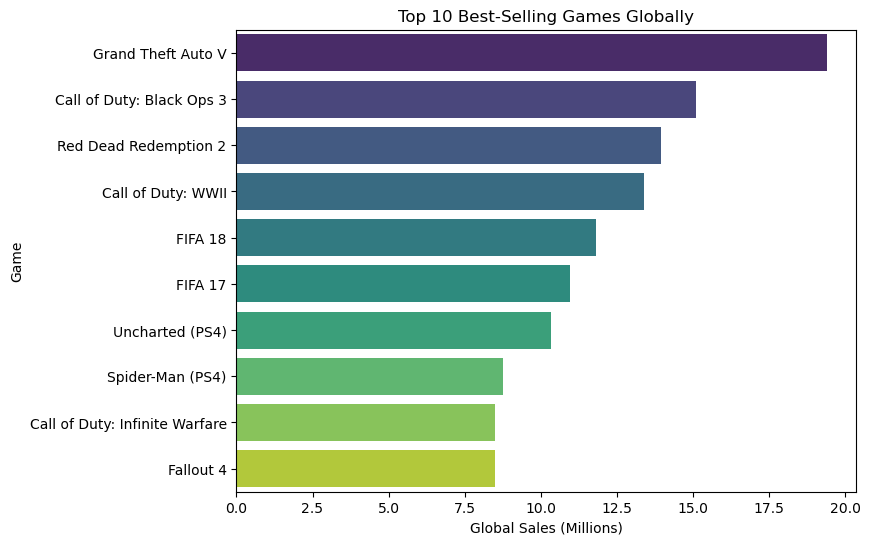

In [53]:
top_10_games = df.nlargest(10, 'Global')
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_games, x='Global', y='Game', palette='viridis')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game')
plt.show()


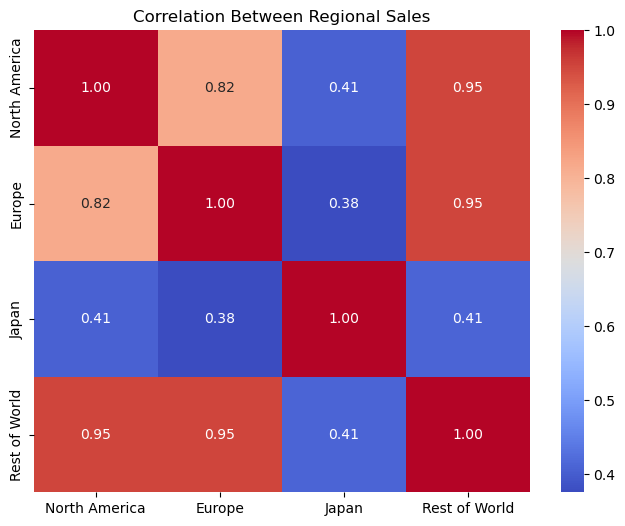

In [57]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['North America', 'Europe', 'Japan', 'Rest of World']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Regional Sales')
plt.show()


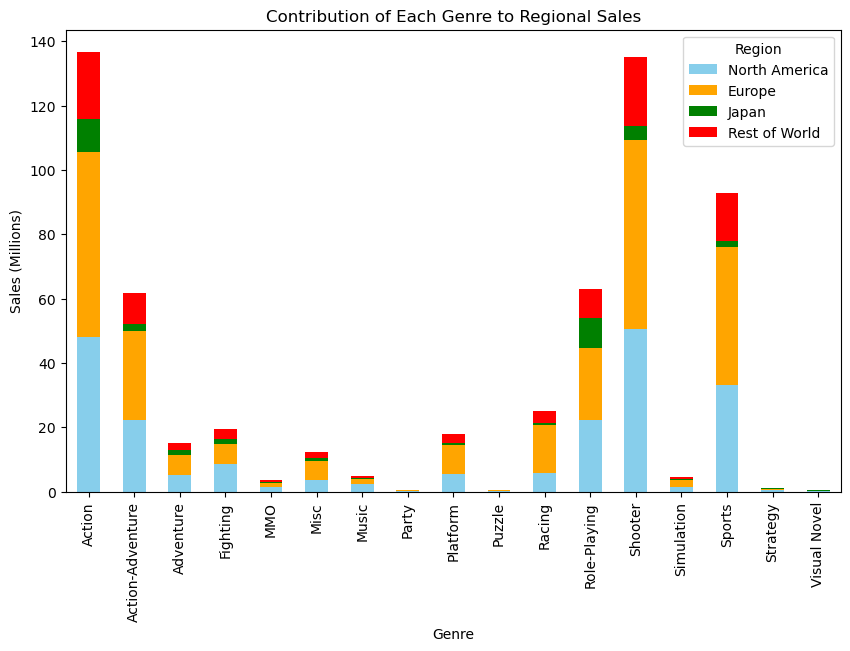

In [61]:
regional_genre_sales = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
regional_genre_sales.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red'])
plt.title('Contribution of Each Genre to Regional Sales')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.show()
